## Imports

In [46]:
# SQL Queries
import sqlite3

# Dataframe
import pandas as pd

# Graphing/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Math
import numpy as np

# Encoing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Scaling data
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Standardization, Normalization

# Offline Exercise

This notebook has the questions and instructions for the offline exercise. If you haven't already, please go through the `README.md` file before you begin answering the questions here.

Make sure you do NOT commit your answers back to the repo. Instead, copy-paste this notebook together with the `touches.sqlite3` file to a separate folder in your machine, type your answers in that copied notebook, and when you're done, share the new Jupyter notebook back with the recruiter together with additional modules, graphs etc. that you may have. You would need to use the data in the `touches.sqlite3` file to answer all the questions.

### Question 1. Find the most common industry out of all the companies that were `contacted`.

In [8]:
con = sqlite3.connect("touches.sqlite3")  # Connecting SQL to database
cursor = con.cursor()  # Connecting curor/pointer to database

In [3]:
cursor.execute("""
SELECT MAX(industry) FROM companies c 
INNER JOIN persons p ON c.id = p.company_id
LEFT JOIN touches t ON p.id = t.person_id
WHERE status LIKE "completed"
""")

print(cursor.fetchall())

[('eCommerce',)]


### Code Explanation

Question 1 wants to return the most
common industry that were contacted.

We first use the key word MAX to select
the max value of the industry column from
the table companies.

The two tables, companies and persons connect 
using an id. An inner join is performed to extract
as much information as possible.

The last statement is the WHERE statement.
Showing results where the status column has
a value of completed

### Question 2. What is the most common touch type sellers use when they’re making their first touch with a person? What about first touch with a company?

In [4]:
# Query for common touch type for a person
cursor.execute("""
SELECT MAX(touch_type) FROM touches t 
INNER JOIN persons p ON t.person_id = p.id
""")

print("Common touch type for person:", cursor.fetchall())

# Second Solution
cursor.execute("""
SELECT DISTINCT MAX(touch_type) FROM persons p
INNER JOIN opportunities o ON p.company_id = o.company_id
INNER JOIN companies c ON p.company_id = c.id
INNER JOIN touches t ON p.id = t.person_id
GROUP BY p.id;
""")

print("Common touch type for person Soultion #2:", cursor.fetchall())

Common touch type for person: [('Phone',)]
Common touch type for person Soultion #2: [('Other',), ('Phone',), ('Email',), ('Integration',)]


### Code Explanation

Selecting the max value of the touch_type column from the touches table.

An inner join is then taken place using the persons table; connecting using id.

The end result turns back phone.

**Reasoning:**

I want to take a moment to explain the process behind this code, for this was actually a little confusing to perform:

I combine the two tables, touches and persons because I'm asked to find the most common touch with a person, and the persons table seemed like the correct choice, and I was able to join it with touches.

The main distiction is the Group by

In [5]:
# Query for common touch type with company
cursor.execute("""
SELECT DISTINCT MAX(touch_type) FROM persons p
INNER JOIN opportunities o ON p.company_id = o.company_id
INNER JOIN companies c ON p.company_id = c.id
INNER JOIN touches t ON p.id = t.person_id
GROUP BY o.company_id
""")

print("Commont touch type for company:", cursor.fetchall())

Commont touch type for company: [('Phone',), ('Other',), ('Email',), ('Integration',)]


### Code Explanation

Selecting the max values out of the touch_type column. 

Grabbing the companies table and performing an inner join with persons on company id and id.

A second inner join is performed with opportunites on the company table id and the opportunities company_id.

The last join is a left join with touches, where we get the touch_type column, and this is on persons id.

**Reasoning:**

I want to take a moment to show my thought process:

I chose to start with the companies table and combine all of the tables with it to achieve my result. 

I chose the companies table because of the question that is asked. 

### Question 3. Describe the distribution of the job seniorities of people that a seller will first try to contact within a company.

To answer this question, you may use visuals, graphs, bunch of scores, tables, writeups - whatever you want. We literally want you to "describe" the distribution to us in the best way you can!

(Note: this question doesn't really have one right answer. It's more about your style of communicating the results.)

In [6]:
cursor.execute("""
SELECT COUNT(job_seniority), * FROM persons p
INNER JOIN opportunities o ON p.company_id = o.company_id
INNER JOIN companies c ON p.company_id = c.id
INNER JOIN touches t ON p.id = t.person_id
GROUP BY p.company_id;
""")

# Converting SQL Query to a dataframe
touch_df = pd.DataFrame(cursor.fetchall())
touch_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,57,82,1,Director,3601,1,2018-03-12 14:08:25.107017,Closed Won,1,Diversified Telecommunication Services,51-200 employees,US/Eastern,166380,82,2017-06-01,completed,Phone
1,21,126,2,Executive,3971,2,2018-03-28 18:52:27.102803,Closed Lost,2,Internet Software & Services,51-200 employees,US/Mountain,335104,126,2018-01-24,completed,Other
2,2,511,4,Manager,5655,4,2018-06-12 16:54:57.192067,Closed Won,4,Internet Software & Services,,US/Pacific,813354,511,2019-02-22,completed,Other
3,10,548,6,Manager,1775,6,2018-02-12 13:29:30.725185,Closed Lost,6,Diversified Financial Services,11-50 employees,US/Pacific,217807,548,2017-08-27,completed,Other
4,2,578,8,Individual Contributor,3339,8,2018-02-23 20:51:26.130273,Closed Lost,8,Telecommunications,,US/Eastern,542182,578,2018-07-24,completed,Other


In [7]:
# Adding column names to dataframe
touch_df.rename(columns={0: "number_of_job_seniorities", 1: "person_id", 2: "company_id", 3: "job_seniority", 4: "opportunity_table_id", 
                         5: "company_id_duplicate", 6: "created_at", 7: "latest_stage", 8: "companies_table_id_duplicate", 9: "industry", 
                         10: "size", 11: "location", 12: "touches_table_id", 13: "person_id_duplicate", 14: "touch_scheduled_on", 
                         15: "status", 16: "touch_type"}, inplace=True)

In [8]:
touch_df.head()

,number_of_job_seniorities,person_id,company_id,job_seniority,opportunity_table_id,company_id_duplicate,created_at,latest_stage,companies_table_id_duplicate,industry,size,location,touches_table_id,person_id_duplicate,touch_scheduled_on,status,touch_type
0,57,82,1,Director,3601,1,2018-03-12 14:08:25.107017,Closed Won,1,Diversified Telecommunication Services,51-200 employees,US/Eastern,166380,82,2017-06-01,completed,Phone
1,21,126,2,Executive,3971,2,2018-03-28 18:52:27.102803,Closed Lost,2,Internet Software & Services,51-200 employees,US/Mountain,335104,126,2018-01-24,completed,Other
2,2,511,4,Manager,5655,4,2018-06-12 16:54:57.192067,Closed Won,4,Internet Software & Services,,US/Pacific,813354,511,2019-02-22,completed,Other
3,10,548,6,Manager,1775,6,2018-02-12 13:29:30.725185,Closed Lost,6,Diversified Financial Services,11-50 employees,US/Pacific,217807,548,2017-08-27,completed,Other
4,2,578,8,Individual Contributor,3339,8,2018-02-23 20:51:26.130273,Closed Lost,8,Telecommunications,,US/Eastern,542182,578,2018-07-24,completed,Other


In [9]:
touch_df.shape

(4971, 17)

In [10]:
# Dropping duplicated columns on axis=1, columns.
touch_df.drop(touch_df.columns[[5, 8, 13]], axis=1, inplace=True)

In [11]:
touch_df.head()

,number_of_job_seniorities,person_id,company_id,job_seniority,opportunity_table_id,created_at,latest_stage,industry,size,location,touches_table_id,touch_scheduled_on,status,touch_type
0,57,82,1,Director,3601,2018-03-12 14:08:25.107017,Closed Won,Diversified Telecommunication Services,51-200 employees,US/Eastern,166380,2017-06-01,completed,Phone
1,21,126,2,Executive,3971,2018-03-28 18:52:27.102803,Closed Lost,Internet Software & Services,51-200 employees,US/Mountain,335104,2018-01-24,completed,Other
2,2,511,4,Manager,5655,2018-06-12 16:54:57.192067,Closed Won,Internet Software & Services,,US/Pacific,813354,2019-02-22,completed,Other
3,10,548,6,Manager,1775,2018-02-12 13:29:30.725185,Closed Lost,Diversified Financial Services,11-50 employees,US/Pacific,217807,2017-08-27,completed,Other
4,2,578,8,Individual Contributor,3339,2018-02-23 20:51:26.130273,Closed Lost,Telecommunications,,US/Eastern,542182,2018-07-24,completed,Other


In [12]:
touch_df.shape

(4971, 14)

In [13]:
touch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Data columns (total 14 columns):
number_of_job_seniorities    4971 non-null int64
person_id                    4971 non-null int64
company_id                   4971 non-null int64
job_seniority                4971 non-null object
opportunity_table_id         4971 non-null int64
created_at                   4971 non-null object
latest_stage                 4971 non-null object
industry                     4971 non-null object
size                         4971 non-null object
location                     4971 non-null object
touches_table_id             4971 non-null int64
touch_scheduled_on           4971 non-null object
status                       4971 non-null object
touch_type                   4971 non-null object
dtypes: int64(5), object(9)
memory usage: 543.8+ KB


# Cleaning Data

1. Convert columns
2. Drop columns
3. Drop missing values
4. Convert strings to 

1. Convert columns

In [14]:
# Convertind columns to datetime
touch_df["created_at"] = pd.to_datetime(touch_df["created_at"], yearfirst=True)
touch_df["touch_scheduled_on"] = pd.to_datetime(touch_df["touch_scheduled_on"], yearfirst=True)

2. Drop columns

In [15]:
# Drop column
touch_df.drop(columns=["person_id", "company_id", "opportunity_table_id", "touches_table_id", "created_at", "touch_scheduled_on"], axis=1, inplace=True)

3. Drop missing values

In [16]:
# Replace field that's entirely space (or empty) with NaN
touch_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [17]:
touch_df.isna().sum()

number_of_job_seniorities       0
job_seniority                   0
latest_stage                    0
industry                      448
size                         2605
location                      454
status                          0
touch_type                      0
dtype: int64

In [18]:
# Removing NaN values
touch_df.dropna(inplace=True)

4. Performing One Hot Encoding

In [19]:
# Instantiating label encoder
label_encode = LabelEncoder()

In [20]:
# Instantiating one hot encoder
ohe = OneHotEncoder(drop="first")

In [21]:
# Getting data types that are objects
cat_var = touch_df.select_dtypes(include="object")
num_var = touch_df.select_dtypes(exclude="object")

# Reseting Index
cat_var.reset_index(drop=True, inplace=True)
num_var.reset_index(drop=True, inplace=True)

In [22]:
job_seniority_col = cat_var[["job_seniority"]]

# Dropping job_seniority column
cat_var.drop(columns=["job_seniority"], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
job_sen_col_dummies = pd.get_dummies(job_seniority_col, drop_first=True)

In [24]:
# Rejoining the job_seniority column to cat_var
cat_var = cat_var.join(job_sen_col_dummies, how="left")

touch_df = num_var.join(cat_var, how="left")

4b. Performing label encoding

In [26]:
# Choosing columns that will be label encoded
touch_df["latest_stage"] = label_encode.fit_transform(touch_df["latest_stage"])
touch_df["industry"] = label_encode.fit_transform(touch_df["industry"])
touch_df["size"] = label_encode.fit_transform(touch_df["size"])
touch_df["location"] = label_encode.fit_transform(touch_df["location"])
touch_df["status"] = label_encode.fit_transform(touch_df["status"])
touch_df["touch_type"] = label_encode.fit_transform(touch_df["touch_type"])

In [27]:
touch_df.head()

,number_of_job_seniorities,latest_stage,industry,size,location,status,touch_type,job_seniority_Executive,job_seniority_Individual Contributor,job_seniority_Manager,job_seniority_Unknown,job_seniority_Vice President
0,57,1,28,63,13,0,3,0,0,0,0,0
1,21,0,61,63,14,0,2,1,0,0,0,0
2,10,0,27,21,15,0,2,0,0,1,0,0
3,5,3,61,21,15,0,2,0,0,0,0,1
4,62,1,71,39,8,0,3,0,0,0,0,1


In [28]:
touch_df.shape

(2348, 12)

In [29]:
touch_df.columns

Index(['number_of_job_seniorities', 'latest_stage', 'industry', 'size',
       'location', 'status', 'touch_type', 'job_seniority_Executive',
       'job_seniority_Individual Contributor', 'job_seniority_Manager',
       'job_seniority_Unknown', 'job_seniority_Vice President'],
      dtype='object')

In [30]:
touch_df["job_seniority_Executive"].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       0
3       0
4       0
       ..
2343    1
2344    0
2345    0
2346    1
2347    0
Name: job_seniority_Executive, Length: 2348, dtype: uint8>

In [31]:
touch_df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_job_seniorities,2348.0,107.027257,108.686927,1.0,25.0,70.5,155.0,743.0
latest_stage,2348.0,1.318143,1.864766,0.0,0.0,1.0,1.0,6.0
industry,2348.0,59.201022,17.468593,0.0,61.0,61.0,61.0,106.0
size,2348.0,39.130750,20.612819,0.0,20.0,38.0,62.0,73.0
location,2348.0,13.033646,2.066465,0.0,13.0,13.0,15.0,15.0
status,2348.0,0.075809,0.377525,0.0,0.0,0.0,0.0,2.0
touch_type,2348.0,1.222317,1.212411,0.0,0.0,2.0,2.0,3.0
job_seniority_Executive,2348.0,0.091567,0.288476,0.0,0.0,0.0,0.0,1.0
job_seniority_Individual Contributor,2348.0,0.105622,0.307418,0.0,0.0,0.0,0.0,1.0
job_seniority_Manager,2348.0,0.197615,0.398285,0.0,0.0,0.0,0.0,1.0


In [32]:
touch_df.tail(30)

,number_of_job_seniorities,latest_stage,industry,size,location,status,touch_type,job_seniority_Executive,job_seniority_Individual Contributor,job_seniority_Manager,job_seniority_Unknown,job_seniority_Vice President
2318,34,1,61,20,12,0,3,0,0,0,0,0
2319,42,0,47,28,13,0,3,0,0,1,0,0
2320,57,0,35,21,15,0,3,0,0,0,0,0
2321,12,1,28,35,15,0,0,0,0,1,0,0
2322,37,0,96,17,13,0,3,0,0,0,0,0
2323,4,5,82,62,13,0,0,0,0,0,1,0
2324,104,5,61,63,15,0,2,0,0,0,0,1
2325,43,5,9,38,14,0,2,0,0,0,0,1
2326,72,4,61,39,13,0,3,0,0,0,0,0
2327,14,0,59,35,9,0,3,0,0,0,0,0


# Distribution

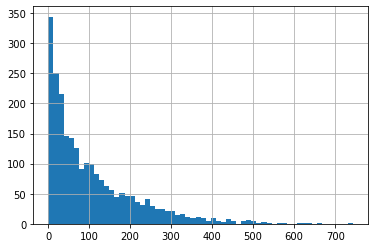

In [33]:
touch_df["number_of_job_seniorities"].hist(bins=60)

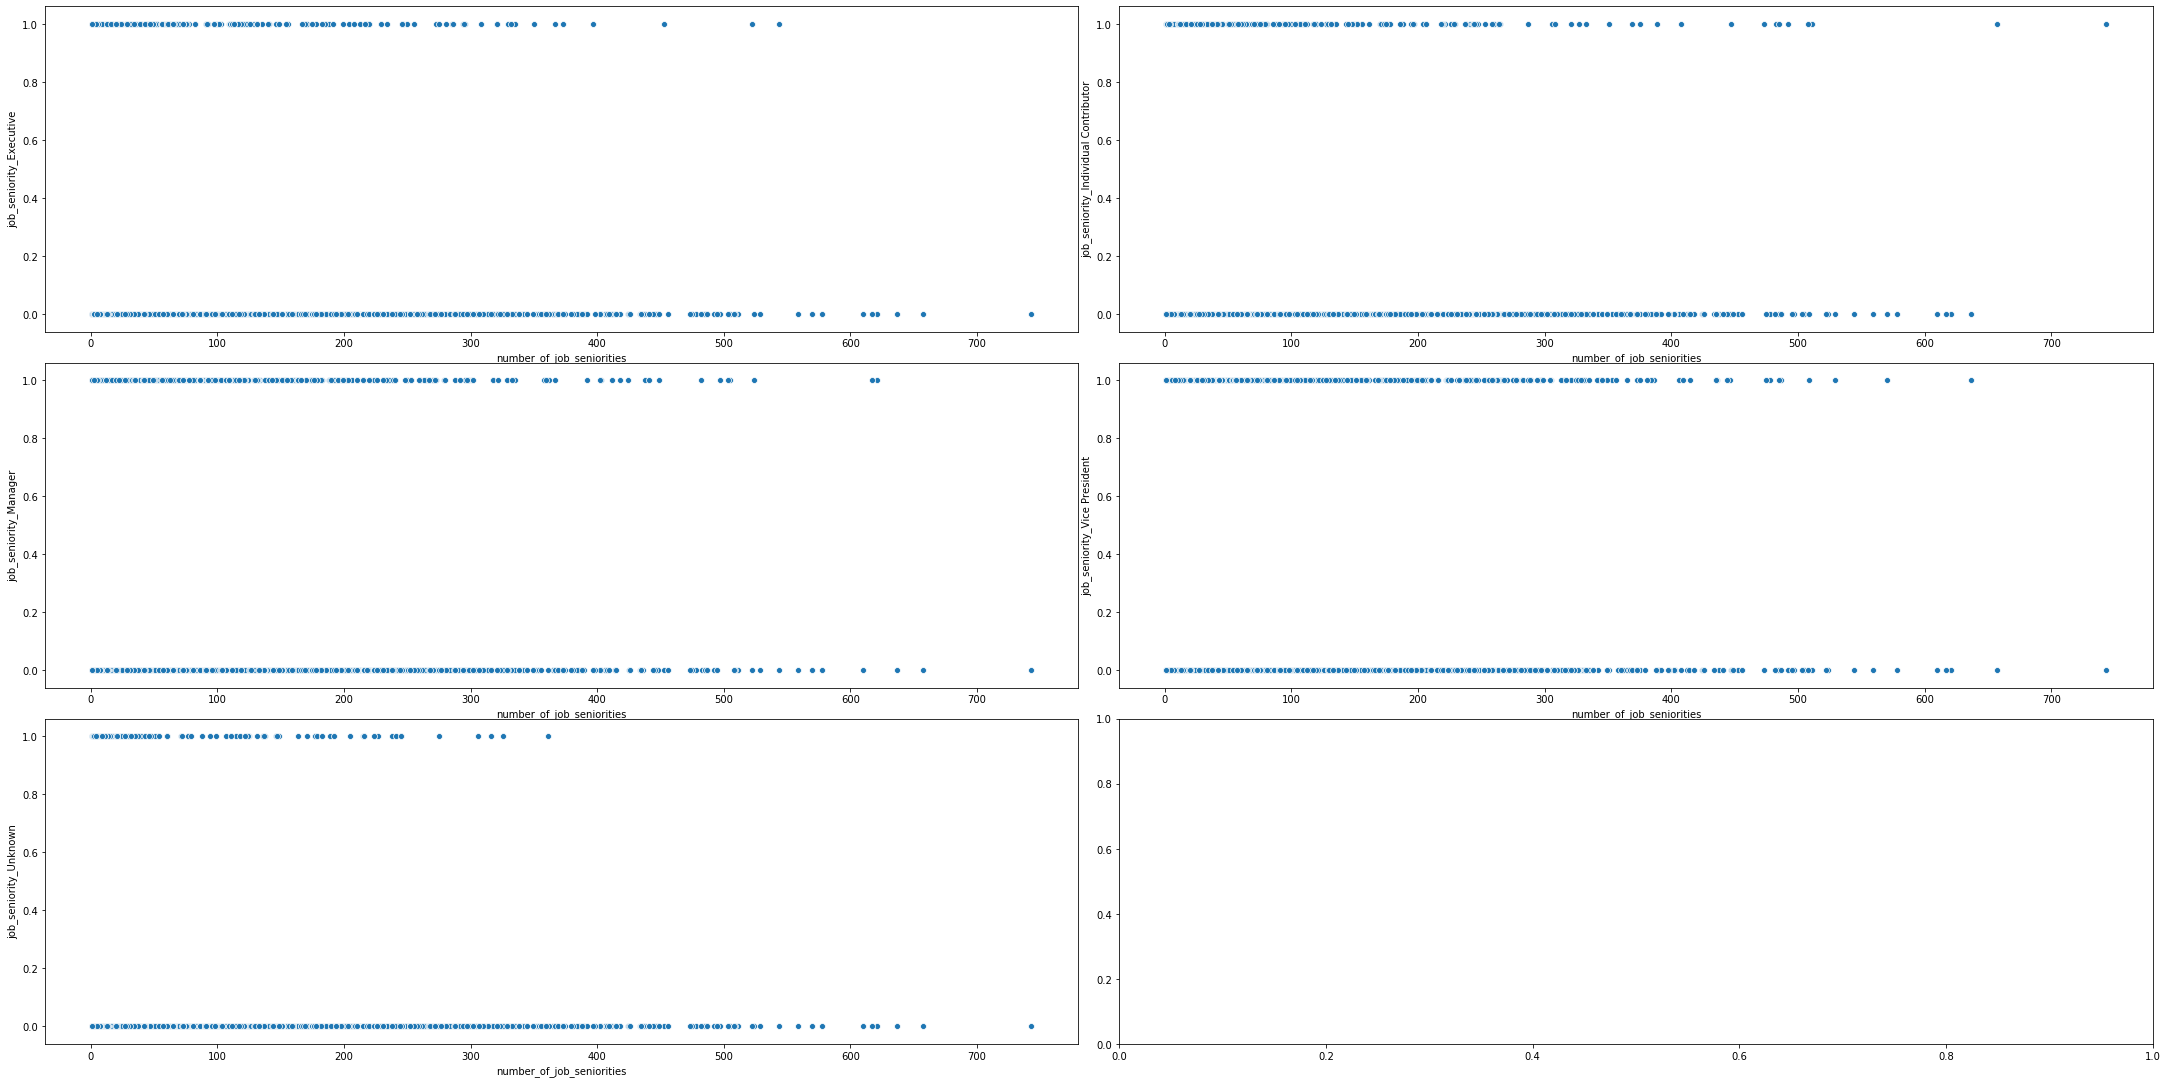

In [34]:
fig, ax = plt.subplots(3, 2)

# Setting height and width of subplots
fig.set_figheight(15)
fig.set_figwidth(30)

# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)

# Scatter plot of number of job seniority to the type of job seniority
sns.scatterplot(x=touch_df["number_of_job_seniorities"], y=touch_df["job_seniority_Executive"], ax=ax[0, 0])
sns.scatterplot(x=touch_df["number_of_job_seniorities"], y=touch_df["job_seniority_Individual Contributor"], ax=ax[0, 1])
sns.scatterplot(x=touch_df["number_of_job_seniorities"], y=touch_df["job_seniority_Manager"], ax=ax[1, 0])
sns.scatterplot(x=touch_df["number_of_job_seniorities"], y=touch_df["job_seniority_Vice President"], ax=ax[1, 1])
sns.scatterplot(x=touch_df["number_of_job_seniorities"], y=touch_df["job_seniority_Unknown"], ax=ax[2, 0])

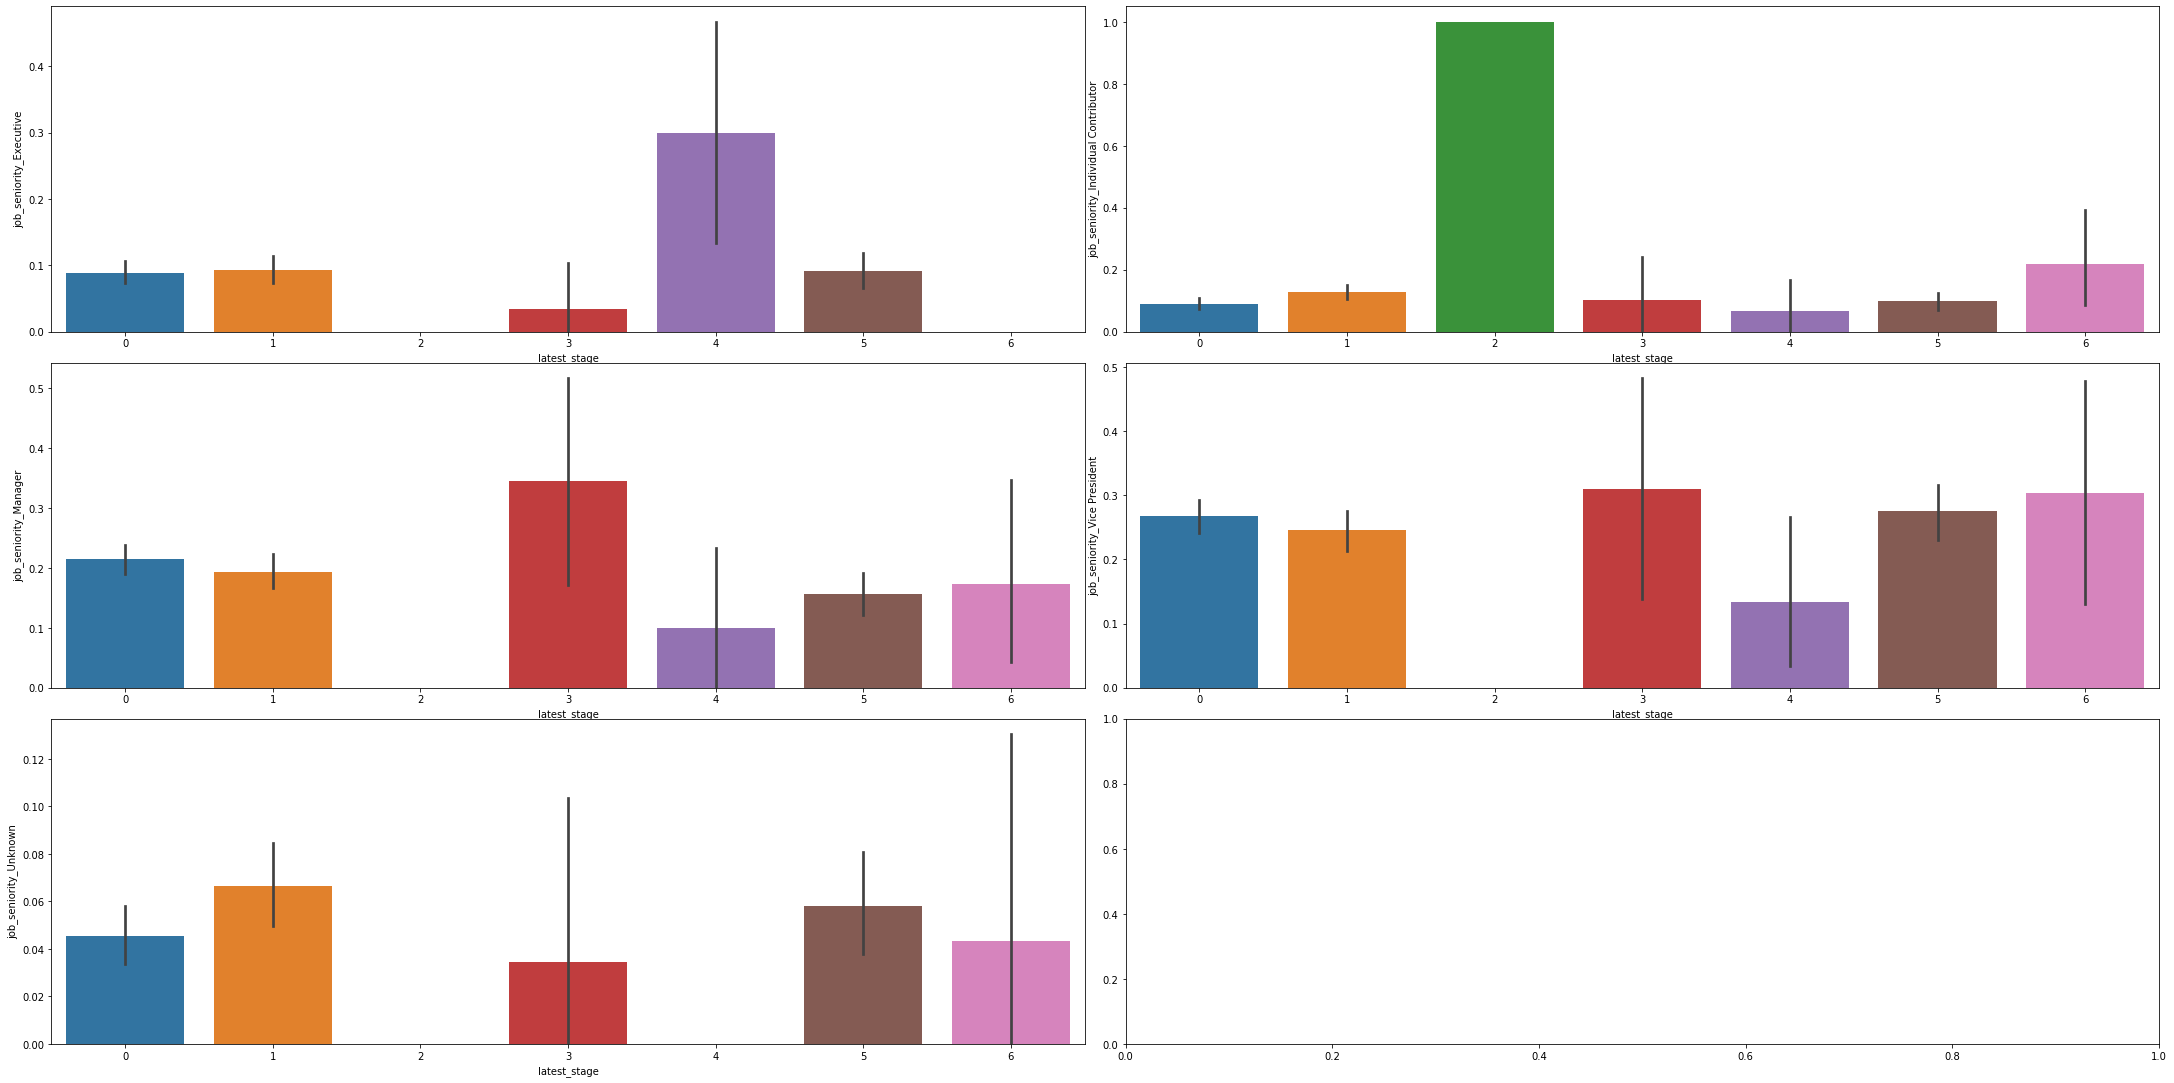

In [35]:
fig, ax = plt.subplots(3, 2)

# Setting height and width of subplots
fig.set_figheight(15)
fig.set_figwidth(30)

# Adding spacing between boxes
fig.tight_layout(h_pad=True, w_pad=True)

sns.barplot(x=touch_df["latest_stage"], y=touch_df["job_seniority_Executive"], ax=ax[0, 0])
sns.barplot(x=touch_df["latest_stage"], y=touch_df["job_seniority_Individual Contributor"], ax=ax[0, 1])
sns.barplot(x=touch_df["latest_stage"], y=touch_df["job_seniority_Manager"], ax=ax[1, 0])
sns.barplot(x=touch_df["latest_stage"], y=touch_df["job_seniority_Vice President"], ax=ax[1, 1])
sns.barplot(x=touch_df["latest_stage"], y=touch_df["job_seniority_Unknown"], ax=ax[2, 0])

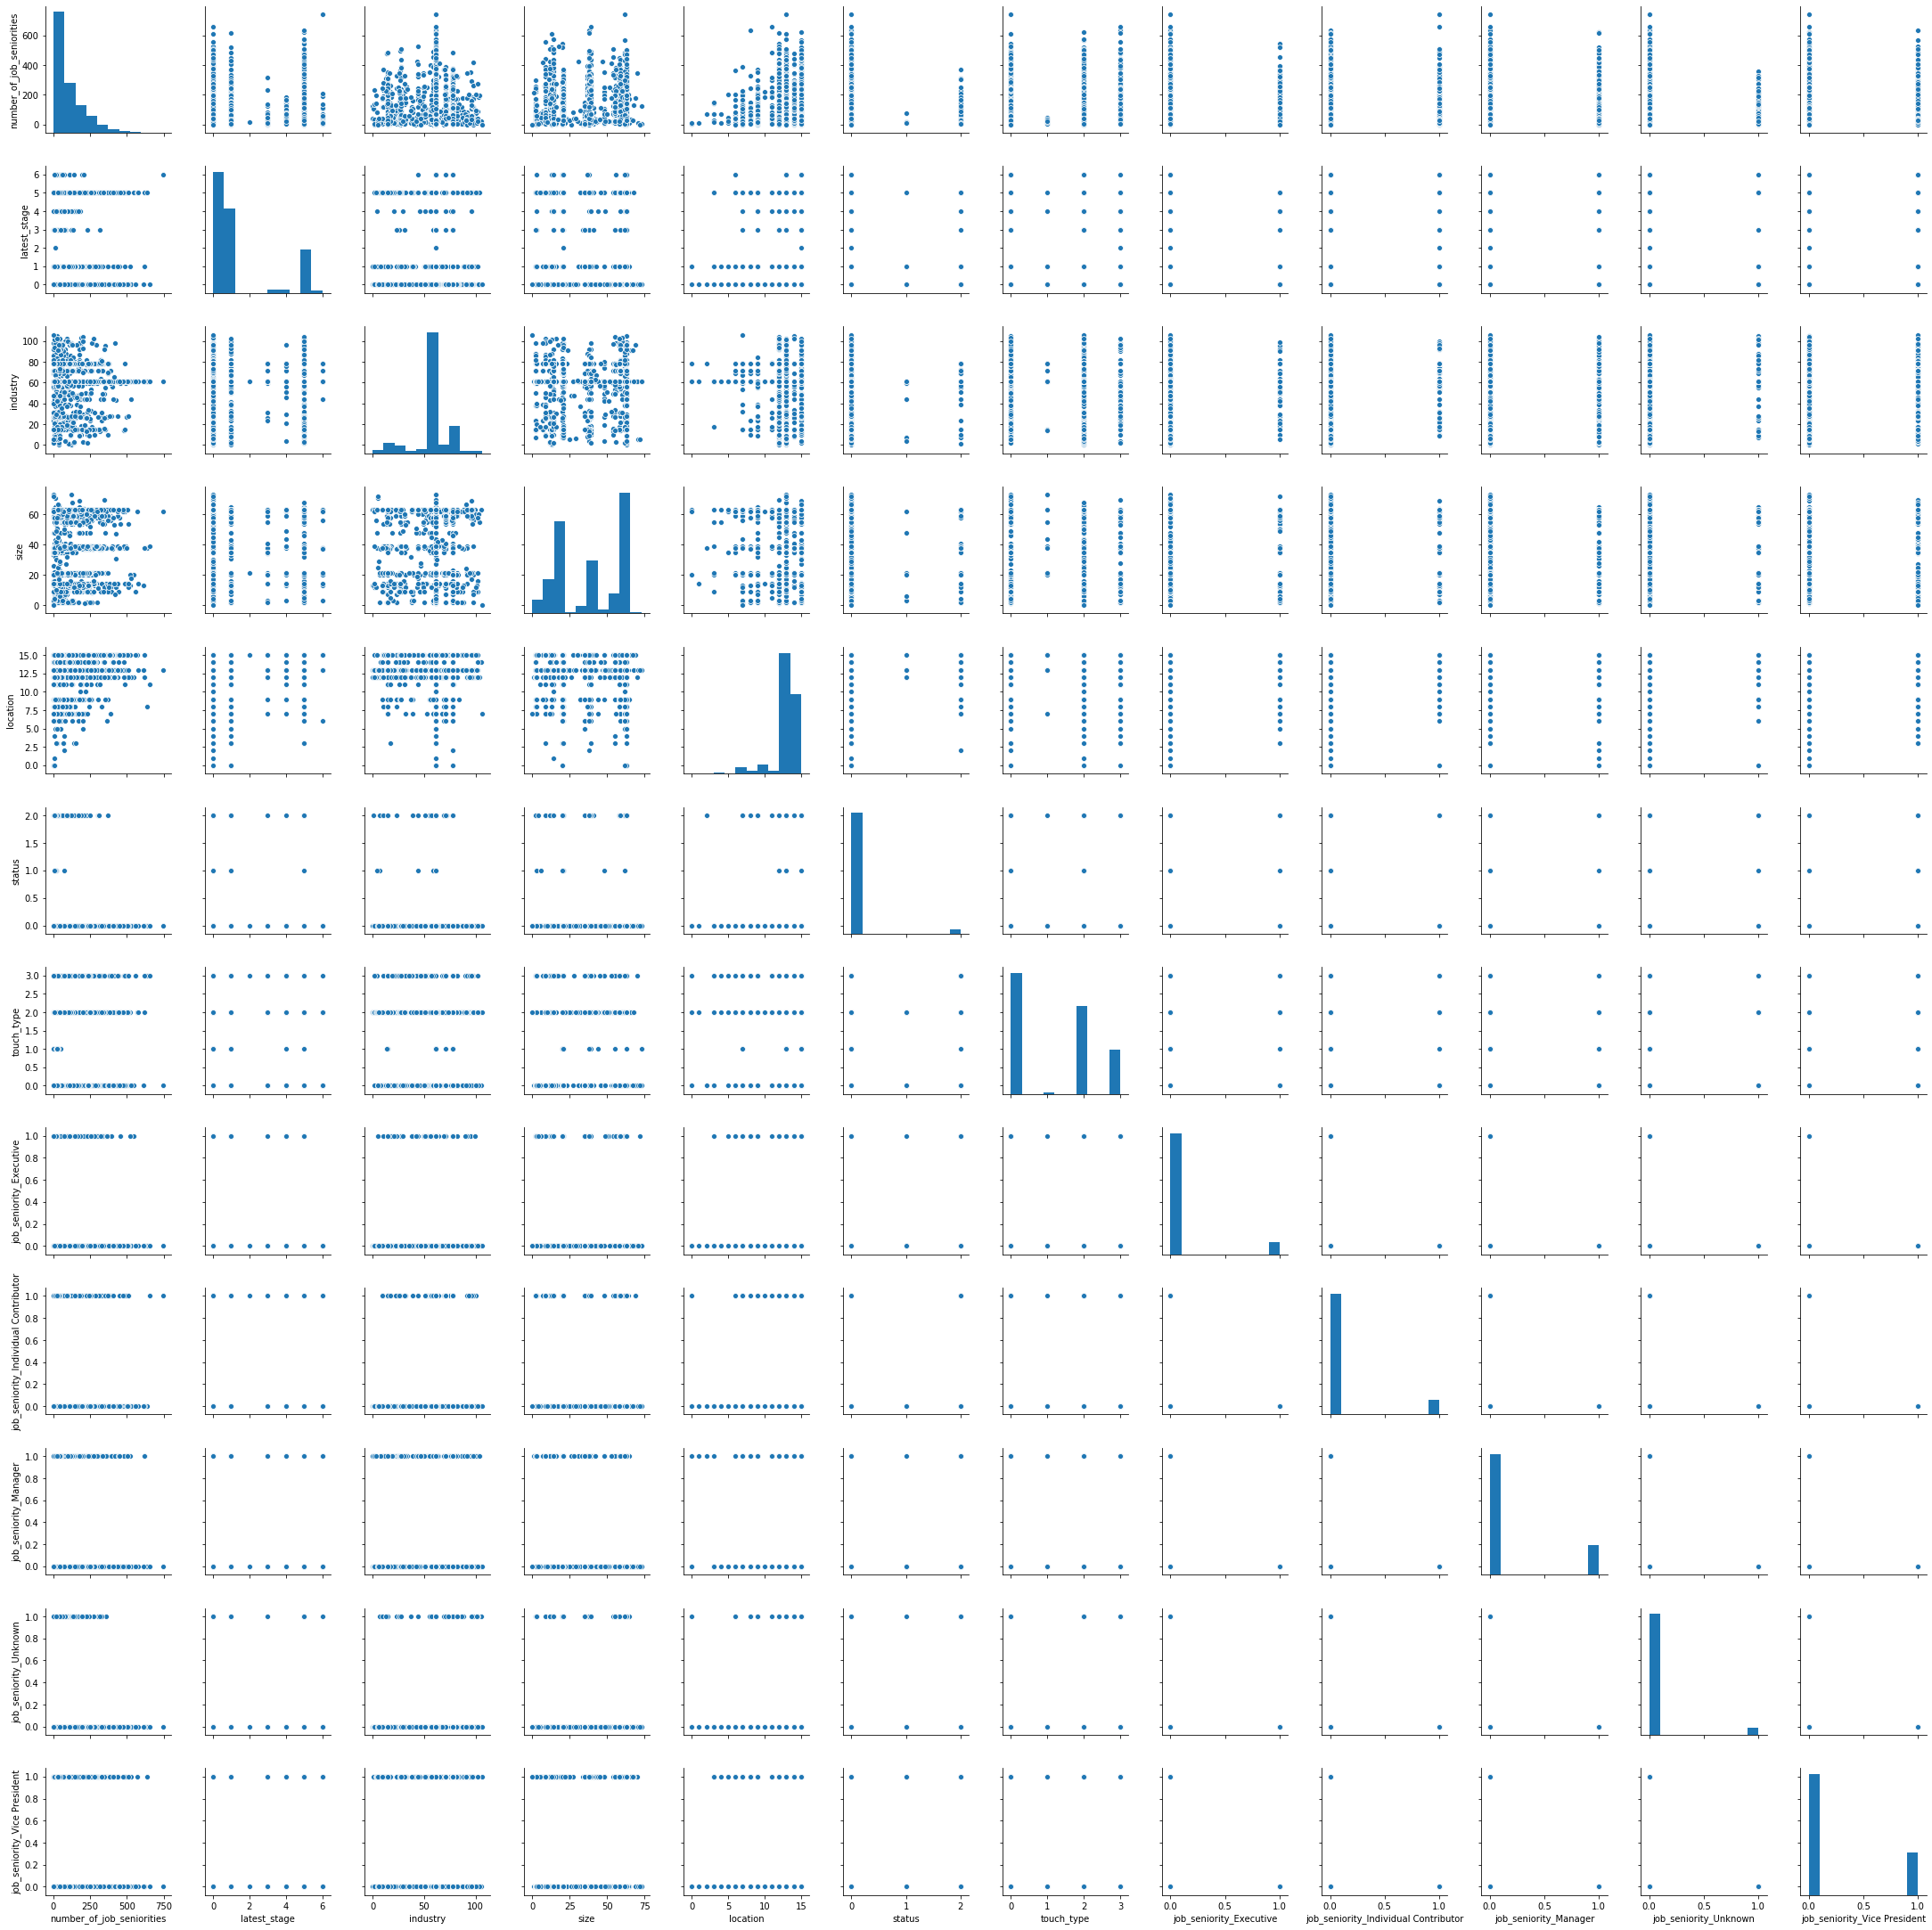

In [36]:
sns.pairplot(touch_df)

In [37]:
cursor.execute("""
SELECT COUNT(job_seniority), job_seniority FROM persons p
INNER JOIN opportunities o ON p.company_id = o.company_id
INNER JOIN companies c ON p.company_id = c.id
INNER JOIN touches t ON p.id = t.person_id
GROUP BY job_seniority 
ORDER BY COUNT(job_seniority) DESC
""")

print(cursor.fetchall())

[(124783, 'Director'), (119722, 'Vice President'), (70369, 'Manager'), (41149, 'Executive'), (30231, 'Individual Contributor'), (12294, 'Unknown')]


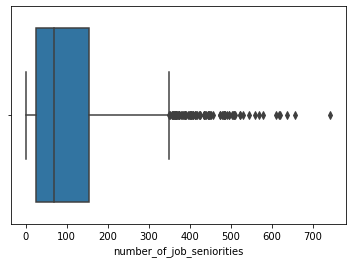

In [38]:
# Plotting ouliers using a box plot
sns.boxplot(touch_df["number_of_job_seniorities"])

# Conclusion/Answer Question 4

Binary Value Meanings: 

    - 1 = Yes
    
    - 0 = NO
    
Latest Stage Value Meanings:

    - 0 = Closed Won
    - 1 = Closed Lost
    - 2 = Developing
    - 3 = Disqualified
    - 4 = SDR Open
    - 5 = Discovery
    - 6 = Contract Negotiation
    
When looking at the data I've noticed that when a seller contacts a compnay, they usually only contact 1 job seniority.

When contacting the vice president of a company, they've recieved more "Closed Won" out of "Closed Lost," than any other job seniority, but they also recieve a great number of "Disqualified," and "Contract Negotiation" statuses.

When contacting an independent contractor, a seller has recieved more "Developing" statuses. This explains why they are more reluctant to contact an individual contractor. 

The highest job seniority that is contacted more times in a company is a Director, then comes the Vice President, Manager, Executive, Individual Contractor, and Unknown. But it is worth nothing that there are huge outliers when it comes to "Directors." There has been a sighting of at most 700+ Directors contacted within one company. This means that the number is heavily inflated when sellers come into contact with multiple companies.

When contacting the manager of a company, the seller usually gets a "Closed Won" status or a "Disqualified" status.

When an executive is contacted, the seller is left with a status off "SDR Open." You can also see that very few sellers contact executives within companies.

### Question 4. Describe the distribution of the mixture of job seniorities of people that a seller will touch during the entire engagement with a company.
Keep in mind that you get to decide what “mixture” means, so do begin your answer by defining it - and explaining why you think this definition makes sense. Again, feel free to use whatever visuals, graphs, bunch of scores, tables, writeups etc. that you think is appropriate for this question.

(Note: this question doesn't really have one right answer. It's more about your style of communicating the results.)

### Answer to Question 4:

In the sense of "mixture," I believe that it has something to do with two or more materials, maybe in this case methods, combined/used together. To me this definition that I just stated closely resembles and ensemble method; where two or more learners are averaged to gain a better prediction.


So the mixture of Job Seniorities that we've seen with the graphs/EDA above have been mostly centered around high level job seniority people when contating a company. The seller does not just stop at one Director, Executive, etc. when contacting a company, the seller chooses their mark and contacts multiple Directors, Executives, Managers, etc. within that one company. 

e.g. The seller has several job seniorities to choose from when wanting to contact a person at company 1. For this example we will say that the seller contacts a Director at company 1. The seller doesn't just stop at 1 Director in company 1, but chooses multiple Directors within company 1. This has given the seller a mixture of job seniorities, connecting it back to an ensemble method; instead of getting a "no" from just 1 Director in company, the seller chooses to contact multiple Directors in company 1 until he gets a "yes."
The seller has used multiple learners to have a better prediction/outcome.

In [39]:
"""
In the sense of "mixture," I believe that it has something to do with two or more materials, 
maybe in this case methods, combined/used together. 
To me this definition that I just stated closely resembles and ensemble method; where two or more learners are averaged to gain a better prediction.

So the mixture of Job Seniorities that we've seen with the graphs/EDA above have been mostly centered around 
high level job seniority people when contating a company. The seller does not just stop at one Director, Executive, etc.
when contacting a company, the seller chooses their mark and contacts multiple Directors, Executives, Managers, etc. within that one company.

e.g. The seller has several job seniorities to choose from when wanting to contact a person at company 1. 
For this example we will say that the seller contacts a Director at company 1. 
The seller doesn't just stop at 1 Director in company 1, but chooses multiple Directors within company 1. 
This has given the seller a mixture of job seniorities, connecting it back to an ensemble method; instead of getting a "no" from just 1 Director in company, 
the seller chooses to contact multiple Directors in company 1 until he gets a "yes." The seller has used multiple learners to have a better prediction/outcome.
"""

'\nIn the sense of "mixture," I believe that it has something to do with two or more materials, \nmaybe in this case methods, combined/used together. \nTo me this definition that I just stated closely resembles and ensemble method; where two or more learners are averaged to gain a better prediction.\n\nSo the mixture of Job Seniorities that we\'ve seen with the graphs/EDA above have been mostly centered around \nhigh level job seniority people when contating a company. The seller does not just stop at one Director, Executive, etc.\nwhen contacting a company, the seller chooses their mark and contacts multiple Directors, Executives, Managers, etc. within that one company.\n\ne.g. The seller has several job seniorities to choose from when wanting to contact a person at company 1. \nFor this example we will say that the seller contacts a Director at company 1. \nThe seller doesn\'t just stop at 1 Director in company 1, but chooses multiple Directors within company 1. \nThis has given the 

### Question 5. Build an algorithm that, when a seller is about to contact a company it never reached out to before, recommends the best/optimal mixture of job seniorities (with “mixture” as defined by you in Question 4.) they should be targeting within that company during the entire engagement.

This is the hardest question in this exercise. If you feel you have a good idea what the algorithm should look like but either feel uncomfortable coding-wise or feel pressed for time, it is perfectly OK to describe your idea in words. Be clear, explain both what it does and why you think this is the right approach.

Whether or not you go the code-route or writeup-route, be sure to explain the assumptions and choices you made, why you made them and how you would test them.

(Note: like with the previous two questions, this question doesn't really have one right answer either!)

### NOTES:

- The question tells me to use the definition of mixture when performing machine learning, so the best algorithm to use is Random Forest in this section.
- This also sounds like a multi-classification problem
- Job seniorities as target
- The dataframe above is not preped correctly to continue with. We will have to add modifictions to it.

In [9]:
cursor.execute("""
SELECT * FROM persons p
INNER JOIN opportunities o ON p.company_id = o.company_id
INNER JOIN companies c ON p.company_id = c.id
INNER JOIN touches t ON p.id = t.person_id
GROUP BY p.company_id;
""")

# Converting SQL Query to a dataframe
touch_df = pd.DataFrame(cursor.fetchall())
touch_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,82,1,Director,3601,1,2018-03-12 14:08:25.107017,Closed Won,1,Diversified Telecommunication Services,51-200 employees,US/Eastern,166380,82,2017-06-01,completed,Phone
1,126,2,Executive,3971,2,2018-03-28 18:52:27.102803,Closed Lost,2,Internet Software & Services,51-200 employees,US/Mountain,335104,126,2018-01-24,completed,Other
2,511,4,Manager,5655,4,2018-06-12 16:54:57.192067,Closed Won,4,Internet Software & Services,,US/Pacific,813354,511,2019-02-22,completed,Other
3,548,6,Manager,1775,6,2018-02-12 13:29:30.725185,Closed Lost,6,Diversified Financial Services,11-50 employees,US/Pacific,217807,548,2017-08-27,completed,Other
4,578,8,Individual Contributor,3339,8,2018-02-23 20:51:26.130273,Closed Lost,8,Telecommunications,,US/Eastern,542182,578,2018-07-24,completed,Other


In [10]:
touch_df.shape

(4971, 16)

In [11]:
touch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4971 entries, 0 to 4970
Data columns (total 16 columns):
0     4971 non-null int64
1     4971 non-null int64
2     4971 non-null object
3     4971 non-null int64
4     4971 non-null int64
5     4971 non-null object
6     4971 non-null object
7     4971 non-null int64
8     4971 non-null object
9     4971 non-null object
10    4971 non-null object
11    4971 non-null int64
12    4971 non-null int64
13    4971 non-null object
14    4971 non-null object
15    4971 non-null object
dtypes: int64(7), object(9)
memory usage: 621.5+ KB


# Cleaning Data

1. Convert columns
2. Drop columns
3. Drop missing values
4. Convert strings to 

1. Convert columns

In [14]:
# Adding column names to dataframe
touch_df.rename(columns={0: "person_id", 1: "company_id", 2: "job_seniority", 3: "opportunity_table_id", 
                         4: "company_id_duplicate", 5: "created_at", 6: "latest_stage", 7: "companies_table_id_duplicate", 8: "industry", 
                         9: "size", 10: "location", 11: "touches_table_id", 12: "person_id_duplicate", 13: "touch_scheduled_on", 
                         14: "status", 15: "touch_type"}, inplace=True)

In [15]:
# Convertind columns to datetime
touch_df["created_at"] = pd.to_datetime(touch_df["created_at"], yearfirst=True)
touch_df["touch_scheduled_on"] = pd.to_datetime(touch_df["touch_scheduled_on"], yearfirst=True)

2. Drop columns

In [16]:
# Dropping duplicated columns on axis=1, columns.
touch_df.drop(touch_df.columns[[4, 7, 12]], axis=1, inplace=True)

In [17]:
# Drop column
touch_df.drop(columns=["person_id", "company_id", "opportunity_table_id", "touches_table_id", "created_at", "touch_scheduled_on"], axis=1, inplace=True)

3. Drop missing values

In [18]:
# Replace field that's entirely space (or empty) with NaN
touch_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [19]:
touch_df.isna().sum()

job_seniority       0
latest_stage        0
industry          448
size             2605
location          454
status              0
touch_type          0
dtype: int64

In [20]:
# Removing NaN values
touch_df.dropna(inplace=True)

4. Performing One Hot Encoding

Columns to One Hot Encode:

- Status and Touch_type

In [21]:
# Instantiating label encoder
label_encode = LabelEncoder()

In [22]:
# Instantiating one hot encoder
ohe = OneHotEncoder(drop="first")

In [23]:
# Getting data types that are objects
cat_var = touch_df.select_dtypes(include="object")
num_var = touch_df.select_dtypes(exclude="object")

# Reseting Index
cat_var.reset_index(drop=True, inplace=True)
num_var.reset_index(drop=True, inplace=True)

In [24]:
# Checking unique values that will be one hot encoded
touch_df["status"].unique(), touch_df["touch_type"].unique()

(array(['completed', 'skipped', 'reassigned'], dtype=object),
 array(['Phone', 'Other', 'Email', 'Integration'], dtype=object))

In [25]:
job_seniority_col = cat_var[["status", "touch_type"]]

# Dropping job_seniority column
cat_var.drop(columns=["status", "touch_type"], axis=1, inplace=True)

In [26]:
job_sen_col_dummies = pd.get_dummies(job_seniority_col, drop_first=True)

In [27]:
# Rejoining the job_seniority column to cat_var
cat_var = cat_var.join(job_sen_col_dummies, how="left")

touch_df = num_var.join(cat_var, how="left")

4b. Performing label encoding

In [28]:
# Checking unique values that will be label encoded
display(touch_df["job_seniority"].unique(), touch_df["latest_stage"].unique(), touch_df["industry"].unique(), touch_df["size"].unique(), touch_df["location"].unique())

array(['Director', 'Executive', 'Manager', 'Vice President', 'Unknown',
       'Individual Contributor'], dtype=object)

array(['Closed Won', 'Closed Lost', 'Developing', 'Disqualified',
       'SDR Open', 'Discovery', 'Contract Negotiation'], dtype=object)

array(['Diversified Telecommunication Services',
       'Internet Software & Services', 'Diversified Financial Services',
       'Media', 'Information Technology and Services',
       'Computer Software', 'Renewable Electricity',
       'Professional Services', 'Specialized Consumer Services',
       'Technology', 'Corporate Services', 'Manufacturing', 'Advertising',
       'Computer Networking', 'Integrated Telecommunication Services',
       'Financial Services', 'Internet', 'Diversified Consumer Services',
       'Marketing and Advertising', 'Industrial Conglomerates',
       'Telecommunications', 'Pharmaceuticals', 'Facilities Services',
       'Commercial Services & Supplies', 'Other',
       'Health Care Providers & Services', 'Education Services',
       'Human Resources', 'Consulting', 'Retailing',
       'Research & Consulting Services',
       'Information Technology & Services', 'Design', 'Education',
       'Staffing and Recruiting',
       'Electronic Equipment, Instrument

array(['51-200 employees', '11-50 employees', '201-500 employees',
       '501-1000', '51-200', '11-50', '201-500', 'myself only',
       '5001-10000', '1001-5000', '10001+', '1001-5000 employees',
       '10,001+ employees', '501-1000 employees', '1-10', '5000-10,000',
       '81089', '5001-10,000 employees', '2-10', '501-3500 employees',
       '1500', '3501+ employees', '201-1000', '10,000+',
       '5,001-10,000 Employees', '21-100 employees', '1177',
       '1–10 сотрудников', '1-10 employees', '101-500 employees', '330',
       '19', '51-250', '1300', '10,000+ employees', '107000', '1000+',
       '51-100', '1,001-5,000 Employees', '1-50 Employees',
       '51-200 employÃ©s', '836', '21+', '101+', '57',
       '501-1,000 Employees', '175', '24', '25-50', '800', '1-5', '2000',
       '11-25', '100', '+ de 10.001 funcionários', '4069', '220', '128',
       '1-20 employees', '119', '126', '39', '117', '135', '102', '30400',
       '32', '38', '15', '7', '85', '370', '91', '14'], dty

array(['US/Eastern', 'US/Mountain', 'US/Pacific', 'Europe/Istanbul',
       'Europe/London', 'America/Argentina/Buenos_Aires', 'US/Central',
       'Australia/Sydney', 'Europe/Amsterdam', 'Australia/Perth',
       'US/Arizona', 'Asia/Karachi', 'Asia/Kolkata', 'Pacific/Auckland',
       'Asia/Tokyo', 'America/Halifax'], dtype=object)

In [29]:
# Choosing columns that will be label encoded
touch_df["job_seniority"] = label_encode.fit_transform(touch_df["job_seniority"])
touch_df["latest_stage"] = label_encode.fit_transform(touch_df["latest_stage"])
touch_df["industry"] = label_encode.fit_transform(touch_df["industry"])
touch_df["size"] = label_encode.fit_transform(touch_df["size"])
touch_df["location"] = label_encode.fit_transform(touch_df["location"])

In [30]:
touch_df.head()

,job_seniority,latest_stage,industry,size,location,status_reassigned,status_skipped,touch_type_Integration,touch_type_Other,touch_type_Phone
0,0,1,28,63,13,0,0,0,0,1
1,1,0,61,63,14,0,0,0,1,0
2,3,0,27,21,15,0,0,0,1,0
3,5,3,61,21,15,0,0,0,1,0
4,5,1,71,39,8,0,0,0,0,1


In [31]:
touch_df.shape

(2348, 10)

In [32]:
touch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 10 columns):
job_seniority             2348 non-null int64
latest_stage              2348 non-null int64
industry                  2348 non-null int64
size                      2348 non-null int64
location                  2348 non-null int64
status_reassigned         2348 non-null uint8
status_skipped            2348 non-null uint8
touch_type_Integration    2348 non-null uint8
touch_type_Other          2348 non-null uint8
touch_type_Phone          2348 non-null uint8
dtypes: int64(5), uint8(5)
memory usage: 103.3 KB


## Train and Test Split

In [33]:
# Independent and Dependent variable
X = touch_df.drop(columns="job_seniority", axis=1)
y = touch_df["job_seniority"]  # Making target variable job_seniority

In [34]:
# Trian and test spilt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [35]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1878, 9)

(470, 9)

(1878,)

(470,)

In [37]:
# Checking Dependent Variable balance
y_train.value_counts(normalize=True)

0    0.287540
5    0.266773
3    0.193823
2    0.105964
1    0.092119
4    0.053781
Name: job_seniority, dtype: float64

## Random Forest

- No scaling needed when doing a Random Forest model

Random Forest is an ensemble method that samples on a random subset of features.

Random Forest is also very popularized when it comes to Bootstrap Aggregation (Bagging). Bagging is a sampling technique that samples randomly with replacement.

Random Forest works by randomly sampliong 2/3 of the training data on each tree. You can see that we put OOB_score as "True." OOB stands for Out of Bag Data.

OOB is the remaining 1/3 of the data which can be used as testing data on each tree, because OOB is basically unseen data. This allows us to see each tree performance.

In [36]:
# Instantiating random forest
rf_clf = RandomForestClassifier(n_estimators=250, max_depth=15, oob_score=True, random_state=25)

In [38]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=True, random_state=25, verbose=0,
                       warm_start=False)

In [39]:
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

0.7193823216187434
0.2297872340425532


### Conclusion:

There is a huge distinction from the training score and the testing score. More analysis should go into this subject, but for the sake of time I will carry on to another algorithm.

## K Nearest Neighbors

K nearest neighbors is a group classifier that uses distance to achieve its goal, making important for feature scaling.

### Normalization

In [48]:
# Normalizing data
min_max_scaler = MinMaxScaler() # Values will be put in a range from 0 to 1
# Using normalization because the machine learning models that will be used don't have any assumptions/requirements of the data being in a normal distribution
# also some of our data are not in a Gaussian Distribution (Bell Curve/Normal Distribution)

# Normalizing float64 columns to be put in a range of 0 to 1
col_rescaled = min_max_scaler.fit_transform(X_train)
X_train_rescaled = pd.DataFrame(data=col_rescaled, columns=X_train.columns)

In [49]:
# Instantiating KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [50]:
knn_clf.fit(X_train_rescaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
print(knn_clf.score(X_train_rescaled, y_train))
print(knn_clf.score(X_test, y_test))

0.43769968051118213
0.1851063829787234


### Conclusion:

We recieved underfitting/high bias in our model. More testing and EDA should be going into this in order to fix the problem. 